<a href="https://www.kaggle.com/code/shijun666/titanic-competition-sj-1?scriptVersionId=199302154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data processing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## import data 

In [2]:
#load train and test data set

Train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
Test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

Train_data.head()

                       

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Go through the dataset
Train_data.describe()

## for input in ML, Pclass, Age, SibSp, Parch, Fare are numeric
## Name, sex, Ticket, Cabin and Embarked are characters

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# check NA or empty value
Train_data.isna().sum()

## age, cabin, embarked have missing values
## age NA can be replace with mean
## Cabin has 687 NAs out of 891 entries, this column can be depleted. 
### However, missing value in Cabin itself might be correlated with survival, this needs to be tested
## embarked only has two NA, limited impacts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## EDA of the train data set

In [5]:
# import library for analysis and plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
Train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

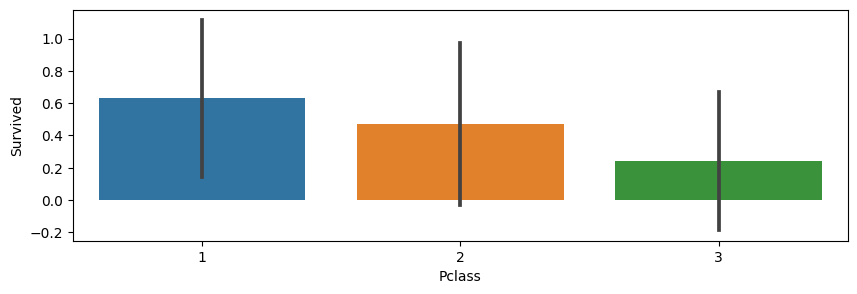

In [7]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Pclass',y='Survived',estimator='mean', errorbar=('sd'))

plt.show() 
## There is correlation of Pclass and survival

In [8]:
Train_data['Name'].value_counts()
#891 unique names, very unlikely to correlate with survival

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

In [9]:
Train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

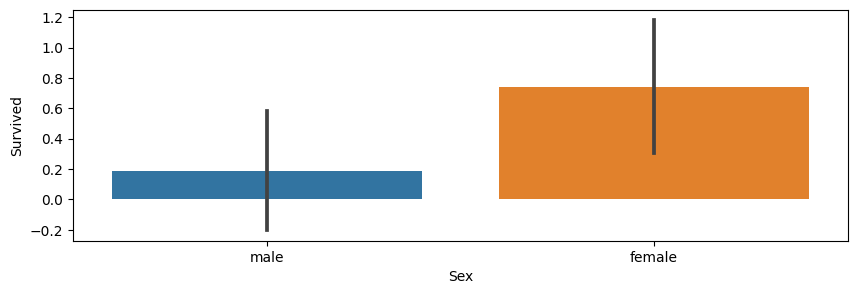

In [10]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Sex',y='Survived',estimator='mean', errorbar=('sd'))

plt.show() 
## Strong correlation between gender and survival

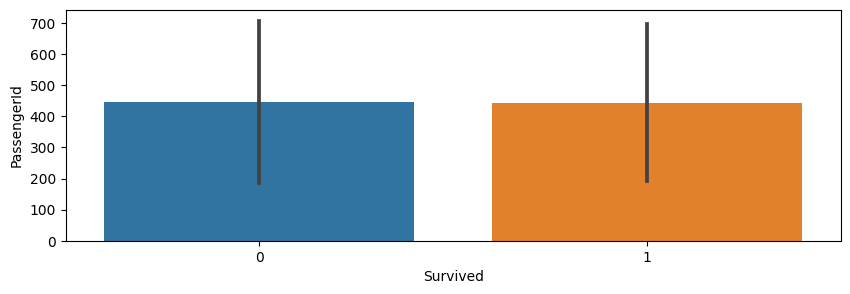

In [11]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Survived',y='PassengerId',estimator='mean', errorbar=('sd'))

plt.show() 
## No correlation between passenger ID and survival

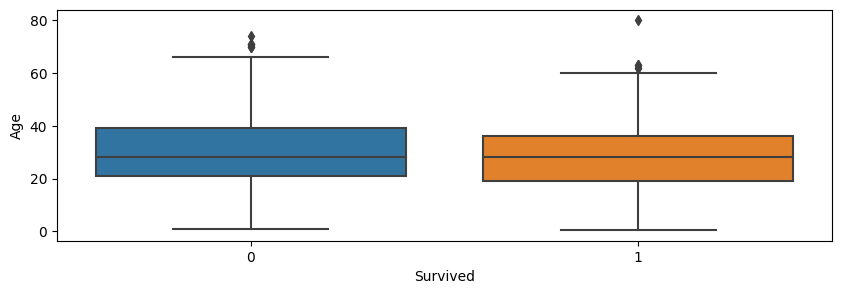

In [12]:
# explore the age
plt.figure(figsize=(10, 3))
sns.boxplot(x='Survived', y='Age', data=Train_data)
plt.show()
## no correlation between survival and age, just replace NA with average

In [13]:
# fill na in age with average value
Age_avg=Train_data['Age'].mean()
print(Age_avg)
Train_data['Age'].fillna(Age_avg, inplace=True)
Train_data.isna().sum()

29.69911764705882


/tmp/ipykernel_17/3479942869.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Train_data['Age'].fillna(Age_avg, inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

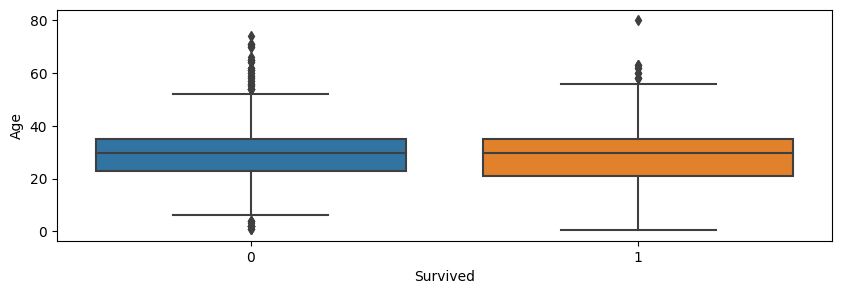

In [14]:
# re do box plot to double confirm
plt.figure(figsize=(10, 3))
sns.boxplot(x='Survived', y='Age', data=Train_data)
plt.show()

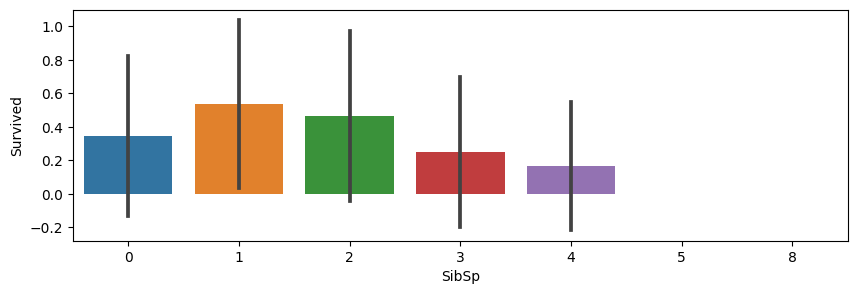

In [15]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='SibSp',y='Survived',estimator='mean', errorbar=('sd'))

plt.show() ## weak correlation between sibsp and survival

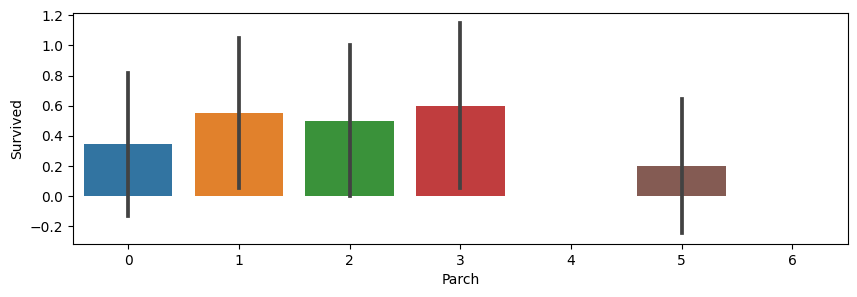

In [16]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Parch',y='Survived',estimator='mean', errorbar=('sd'))

plt.show() ## weak correlation between Parch and survival

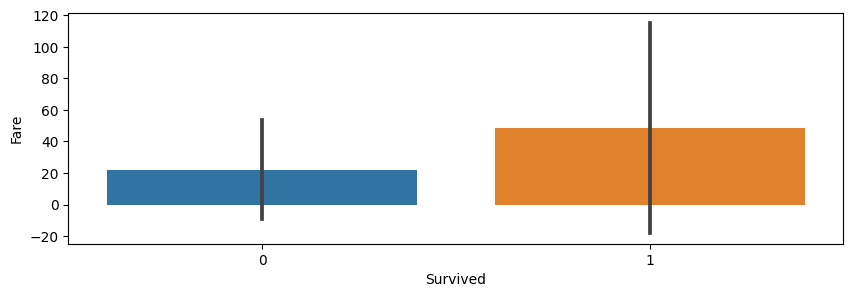

In [17]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Survived',y='Fare',estimator='mean', errorbar=('sd'))

plt.show() ## strong correlation between fare and survival

In [18]:
Train_data['Ticket'].value_counts
# 891 unique ticket, unlikely to correlate with survival
## try to extract the ticket number and check the correlation with survival

<bound method IndexOpsMixin.value_counts of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object>

In [19]:
#extract the ticket number
df=Train_data[['Ticket','Survived']]
df['Ticket_No']=df['Ticket'].str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df.head()

/tmp/ipykernel_17/2190644290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ticket_No']=df['Ticket'].str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


,Ticket,Survived,Ticket_No
0,A/5 21171,0,521171.0
1,PC 17599,1,17599.0
2,STON/O2. 3101282,1,23101282.0
3,113803,1,113803.0
4,373450,0,373450.0


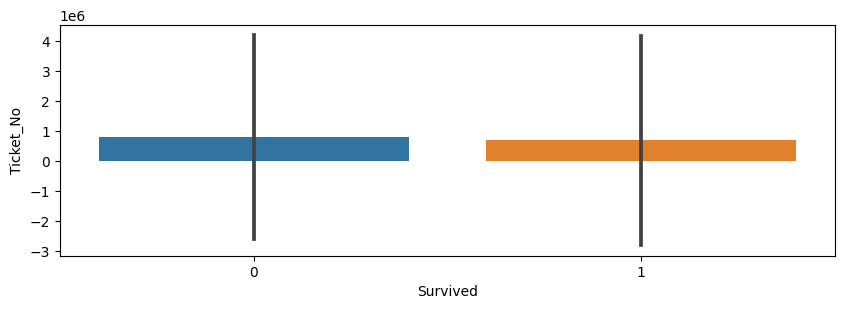

In [20]:
plt.figure(figsize=(10, 3))

sns.barplot(data=df, x='Survived',y='Ticket_No',estimator='mean', errorbar=('sd'))

plt.show() ## can not observe correlation

In [21]:
# assign 'unknown' to NA entry in Cabin column
Train_data['Cabin'].fillna('Unknown', inplace=True)
Train_data.isna().sum()

/tmp/ipykernel_17/2533214718.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Train_data['Cabin'].fillna('Unknown', inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [22]:
#check the average survival rate of unknown Cabin
avg_Unknown = Train_data[Train_data['Cabin'] == 'Unknown']['Survived'].mean()
avg_Cabin= Train_data[Train_data['Cabin'] != 'Unknown']['Survived'].mean()
print(avg_Unknown, avg_Cabin)
# passengers with no record of Cabin number seem to have lower survival rate

0.29985443959243085 0.6666666666666666


In [23]:
#examine the correlation between cabin number and survival
Known_cabin=Train_data[Train_data['Cabin'] != 'Unknown']
Known_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [24]:
Known_cabin['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [25]:
Known_cabin['Cabin_No'] = Known_cabin['Cabin'].str.extract('(\d+)').astype('float64')

/tmp/ipykernel_17/2132579386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Known_cabin['Cabin_No'] = Known_cabin['Cabin'].str.extract('(\d+)').astype('float64')


In [26]:
Known_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,46.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,6.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,103.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


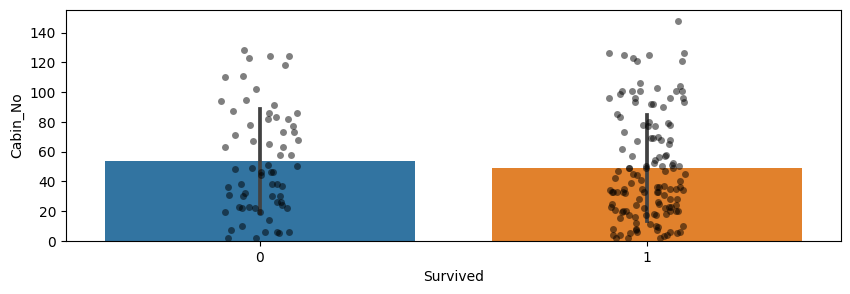

In [27]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Known_cabin, x='Survived',y='Cabin_No',estimator='mean', errorbar=('sd'))
sns.stripplot(data=Known_cabin, x='Survived', y='Cabin_No', color='black', alpha=0.5, jitter=True)
plt.show() ## can not observe correlation

In [28]:
#convert cabin to binary input, 'unknown' as 0, others as 1
for i in Train_data.index:
    if Train_data.loc[i, 'Cabin']=='Unknown':
        Train_data.loc[i, 'Cabin']=0
    else:
        Train_data.loc[i, 'Cabin']=1

Train_data['Cabin'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: object>

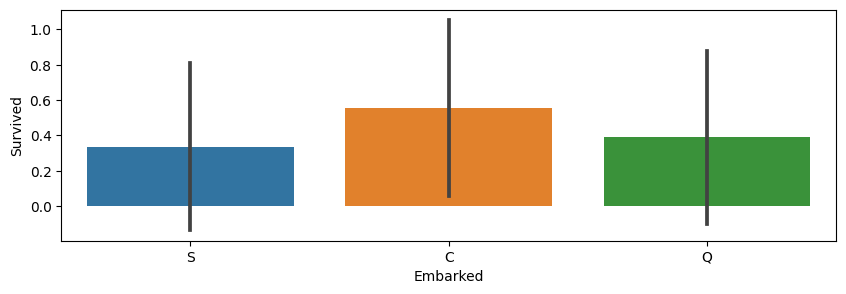

In [29]:
#last input Embarked
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Embarked',y='Survived',estimator='mean', errorbar=('sd'))

plt.show() ## There is correlation

In [30]:
Train_data[Train_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,1,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,1,NaN


In [31]:
Train_data['Embarked'].fillna('C', inplace=True)
Train_data.isna().sum()

/tmp/ipykernel_17/1428538337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Train_data['Embarked'].fillna('C', inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Process test data following the same protocol

In [32]:
Test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
Test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [34]:
Test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
#assign values to NA based on above analysis
Test_data['Cabin'].fillna('Unknown', inplace=True) ## fill NA in Cabin with 'unknown'
test_age_ave=Test_data['Age'].mean()
Test_data['Age'].fillna(test_age_ave, inplace=True) ## fill NA in Age with average age
test_fare_ave=Test_data['Fare'].mean()
Test_data['Fare'].fillna(test_fare_ave, inplace=True) ## fill NA in Fare with average fare

/tmp/ipykernel_17/2261772797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Test_data['Cabin'].fillna('Unknown', inplace=True) ## fill NA in Cabin with 'unknown'
/tmp/ipykernel_17/2261772797.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [36]:
#convert cabin to binary input, 'unknown' as 0, others as 1
for i in Test_data.index:
    if Test_data.loc[i, 'Cabin']=='Unknown':
        Test_data.loc[i, 'Cabin']=0
    else:
        Test_data.loc[i, 'Cabin']=1

Test_data['Cabin'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Cabin, Length: 418, dtype: object>

In [37]:
Test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Summary
### Names, passenger ID, ticket number should be excluded
### age has weak correlation with surival
### Pclass, parch, Embarked, sex, Sibsp, Fare are strongly correlated with survival
### Status of Cabin information (known or unknown) seems to be correlated with survival
### Cabin was converted to binary feature

# ML training and prediction

## This version of model training used features: 'Pclass','Sex','SibSp','Parch','Fare','Embarked', 'Age'
### This version exludes Cabin

In [38]:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# try at least two ML models
## low dimension, binary label
## decisiontree and KNN should be fit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
## try logistic regression as well
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [39]:
# extract the input and output data
y=Train_data['Survived']
print(y.head())

## passengerid, name, ticket will not be used in the ML prediction
x_raw=Train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
print(x_raw.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S


In [40]:
#convert char data to dummy data
x=pd.get_dummies(x_raw, columns=['Sex','Embarked'])

# convert all dat to float type
x=x.astype('float64')
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [41]:
# scale the data
transform = preprocessing.StandardScaler()
x_scaled=transform.fit_transform(x)

X_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

X_scaled_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.485576,-0.307562,0.619306
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.059412,-0.307562,-1.614710
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.485576,-0.307562,0.619306
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.485576,-0.307562,0.619306
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.485576,-0.307562,0.619306


In [42]:
#use scaled data fro numeric features; unscaled data for binary features
#combine scaled and unscaled data
x_final=pd.concat([X_scaled_df[['Pclass','Age','SibSp','Parch','Fare']], 
                   x[['Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]], 
                  axis=1)
x_final.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [43]:
#split train and test set
x_train, x_test, y_train, y_test=train_test_split(x_final, y, test_size=0.2,random_state=6)

### test different ML models

In [44]:
#test KNN model first
# initiate parameters
parameters = {'n_neighbors': [10, 11, 12, 13, 14, 15, 16,17,18,19,20],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv=GridSearchCV(KNN, param_grid=parameters, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                         20],
                         'p': [1, 2]})

In [45]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'algorithm': 'auto', 'n_neighbors': 18, 'p': 1}
0.8145931142410016


In [46]:
#perform knn on the test data set
knn_cv.score(x_test, y_test) ## looks very promising

0.8491620111731844

In [47]:
#generate a function for confusion matrix
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not survived', 'survived']); ax.yaxis.set_ticklabels(['not survived', 'survived']) 
    plt.show() 

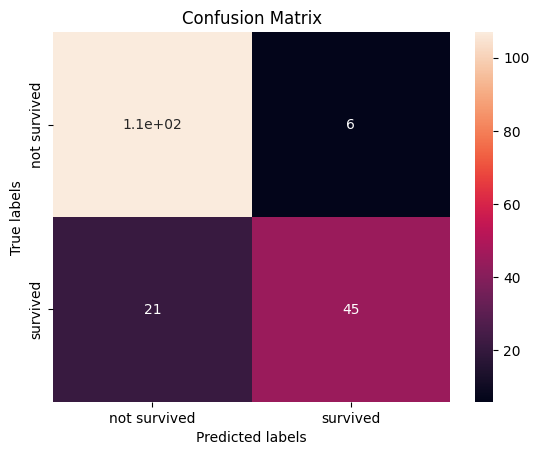

In [48]:
#confusion matrix for KNN model
yhat = knn_cv.predict(x_test)

plot_confusion_matrix(y_test, yhat) 

In [49]:
# try decision tree
## initiate parameters
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4,6,8,10,12],
     'min_samples_split': [2, 5, 10, 20]}

tree = DecisionTreeClassifier()

tree_cv=GridSearchCV(tree, param_grid=parameters, cv=10)
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']})

In [50]:
print(tree_cv.best_params_)
print(tree_cv.best_score_)

{'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 10, 'splitter': 'best'}
0.8202073552425665


In [51]:
tree_cv.score(x_test, y_test) 

0.8435754189944135

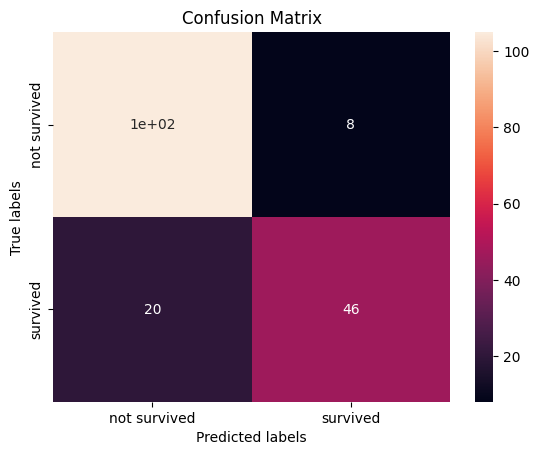

In [52]:
yhat = tree_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

In [53]:
#try logreg model
parameters ={"C":[0.01,0.02, 0.03,0.05,0.06,0.08,0.1,0.2,0.5,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, param_grid=parameters, cv=10)
logreg_cv.fit(x_train, y_train)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 0.03, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7893192488262911


In [54]:
logreg_cv.score(x_test, y_test) ## use logreg model for prediction in this version

0.8659217877094972

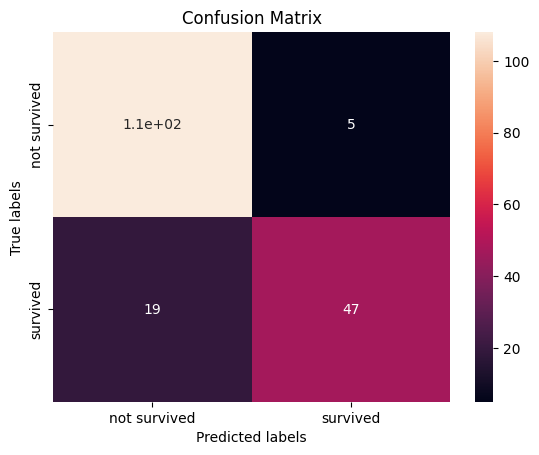

In [55]:
yhat = logreg_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

### use logreg model for the final prediction

In [56]:
x_pre_raw=Test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
print(x_pre_raw.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S


In [57]:
#get dummies
x_pre=pd.get_dummies(x_pre_raw, columns=['Sex','Embarked'])
x_pre=x_pre.astype('float64')
x_pre.head()

# scale the data
x_scaled_pre=transform.fit_transform(x_pre)

X_pre_df = pd.DataFrame(x_scaled_pre, columns=x_pre.columns)

X_pre_df.head()

#combine scaled and unscaled data
x_final_pre=pd.concat([X_pre_df[['Pclass','Age','SibSp','Parch','Fare']], 
                   x_pre[['Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]], 
                  axis=1)
x_final_pre.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,0.334993,-0.499470,-0.400248,-0.498407,0.0,1.0,0.0,1.0,0.0
1,0.873482,1.325530,0.616992,-0.400248,-0.513274,1.0,0.0,0.0,0.0,1.0
2,-0.315819,2.514175,-0.499470,-0.400248,-0.465088,0.0,1.0,0.0,1.0,0.0
3,0.873482,-0.259330,-0.499470,-0.400248,-0.483466,0.0,1.0,0.0,0.0,1.0
4,0.873482,-0.655545,0.616992,0.619896,-0.418471,1.0,0.0,0.0,0.0,1.0


In [58]:
#use logreg for prediction
y_pre=logreg_cv.predict(x_final_pre)
final_df=Test_data[['PassengerId']]
final_df['Survived']=y_pre
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [59]:
#save the data
final_df.to_csv('prediction_v1_without_Cabin', index=False)